In [1]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
from ito_diffusion_1d import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
T = 1
SCHEME_STEPS = 500
LEGEND_SIZE = 32
FONT_SIZE = 32
LAGS = 10

## Brownian motion, with and without drift

Do not confuse autocorrelation and drift!

The drift does not change the autocorrelation, it is a deterministic component around which the process oscillates.

Brownian motion does not exhibit any autocorrelation (by construction, it is a sum of independant Gaussian increments).

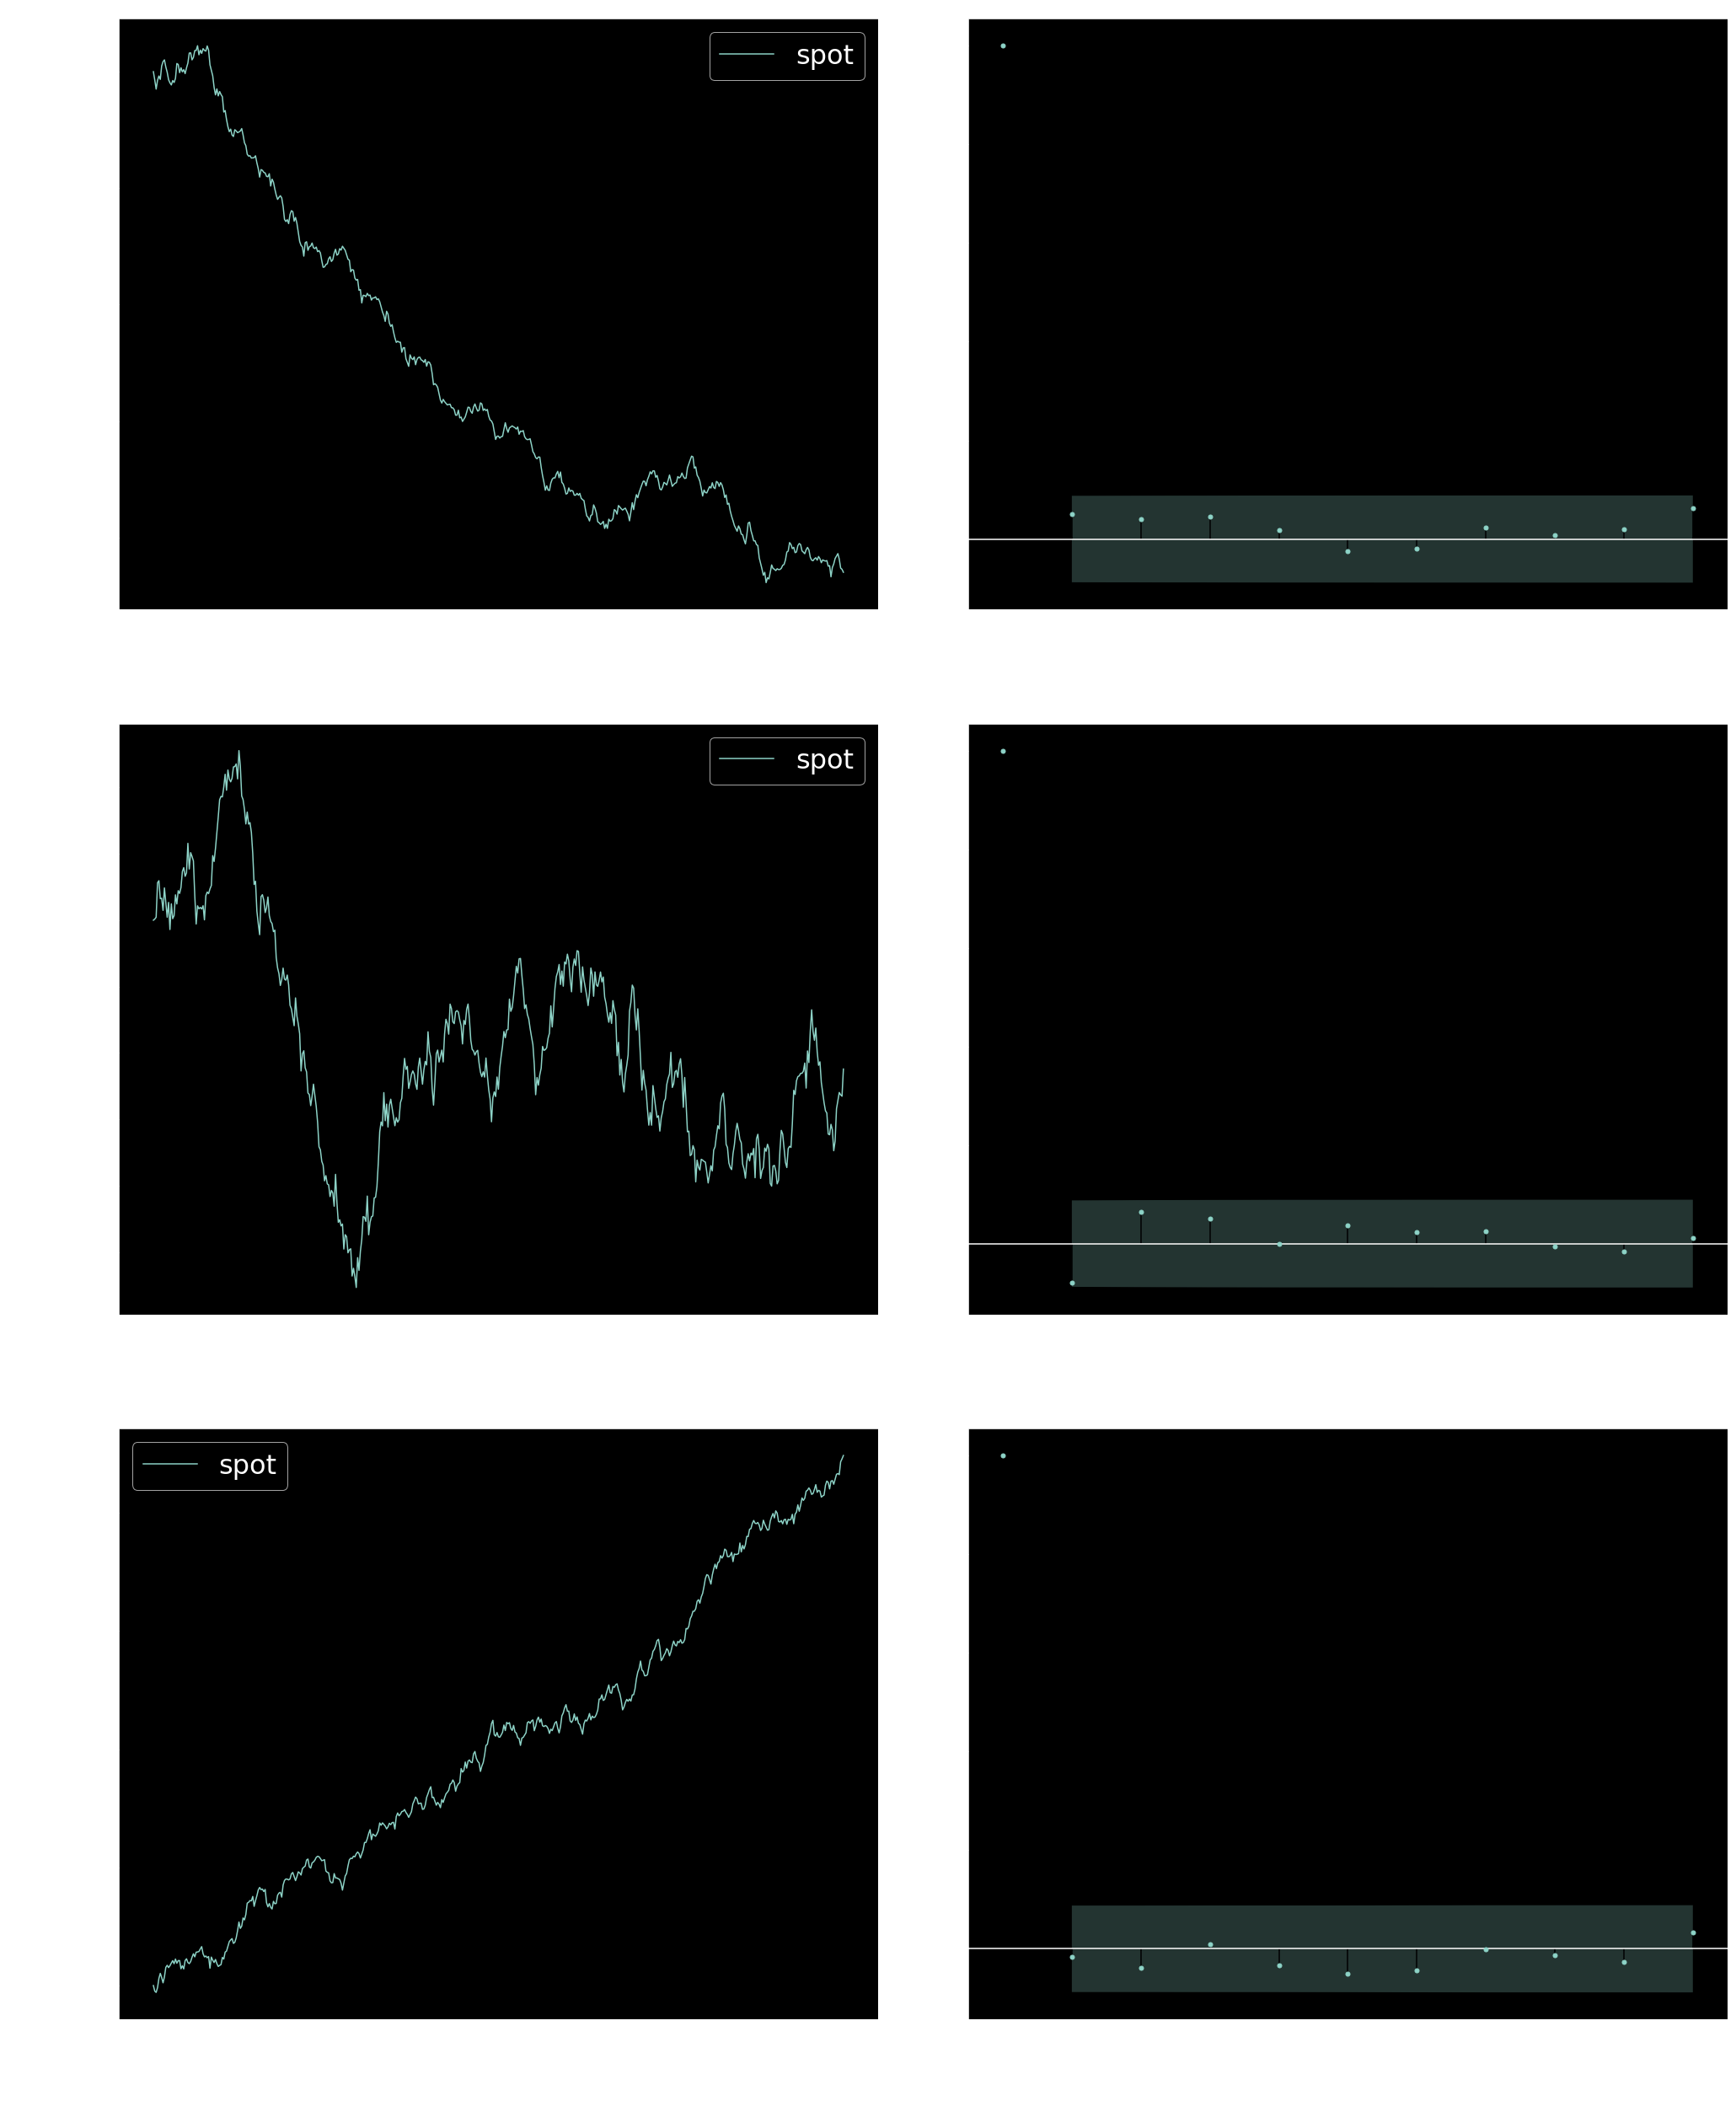

In [3]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=3, ncols=2)

drifts = [-5.0, 0.0, 5.0]

X = BM(x0=100, T=T, scheme_steps=SCHEME_STEPS, vol=1,\
           barrier=0, barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    drift = drifts[i]
    X.drift_double = drift
    df = X.simulate()
    
    for j, ax in enumerate(ax_row):
        if j == 0:
            df.plot(kind='line', ax=ax)
            ax.set_xlabel('time\ndrift={:.2}'.format(drift), fontsize=FONT_SIZE)
            ax.legend(prop={'size': LEGEND_SIZE})
            ax.set_ylabel('spot', fontsize=FONT_SIZE)
        else:
            rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
            plot_acf(rets.values, lags=LAGS, ax=ax, zero=True)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
            ax.set_xlabel('time\ndrift={:.2}'.format(drift), fontsize=FONT_SIZE)
            ax.set_ylabel('autocorrelogram', fontsize=FONT_SIZE)
        
        ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Vasicek model

Mean-reverting processes exhibit negative autocorrelation for odd lags : each subsequent time step tends to move the process in the opposite direction to correct for the noise and revert to the long-term mean

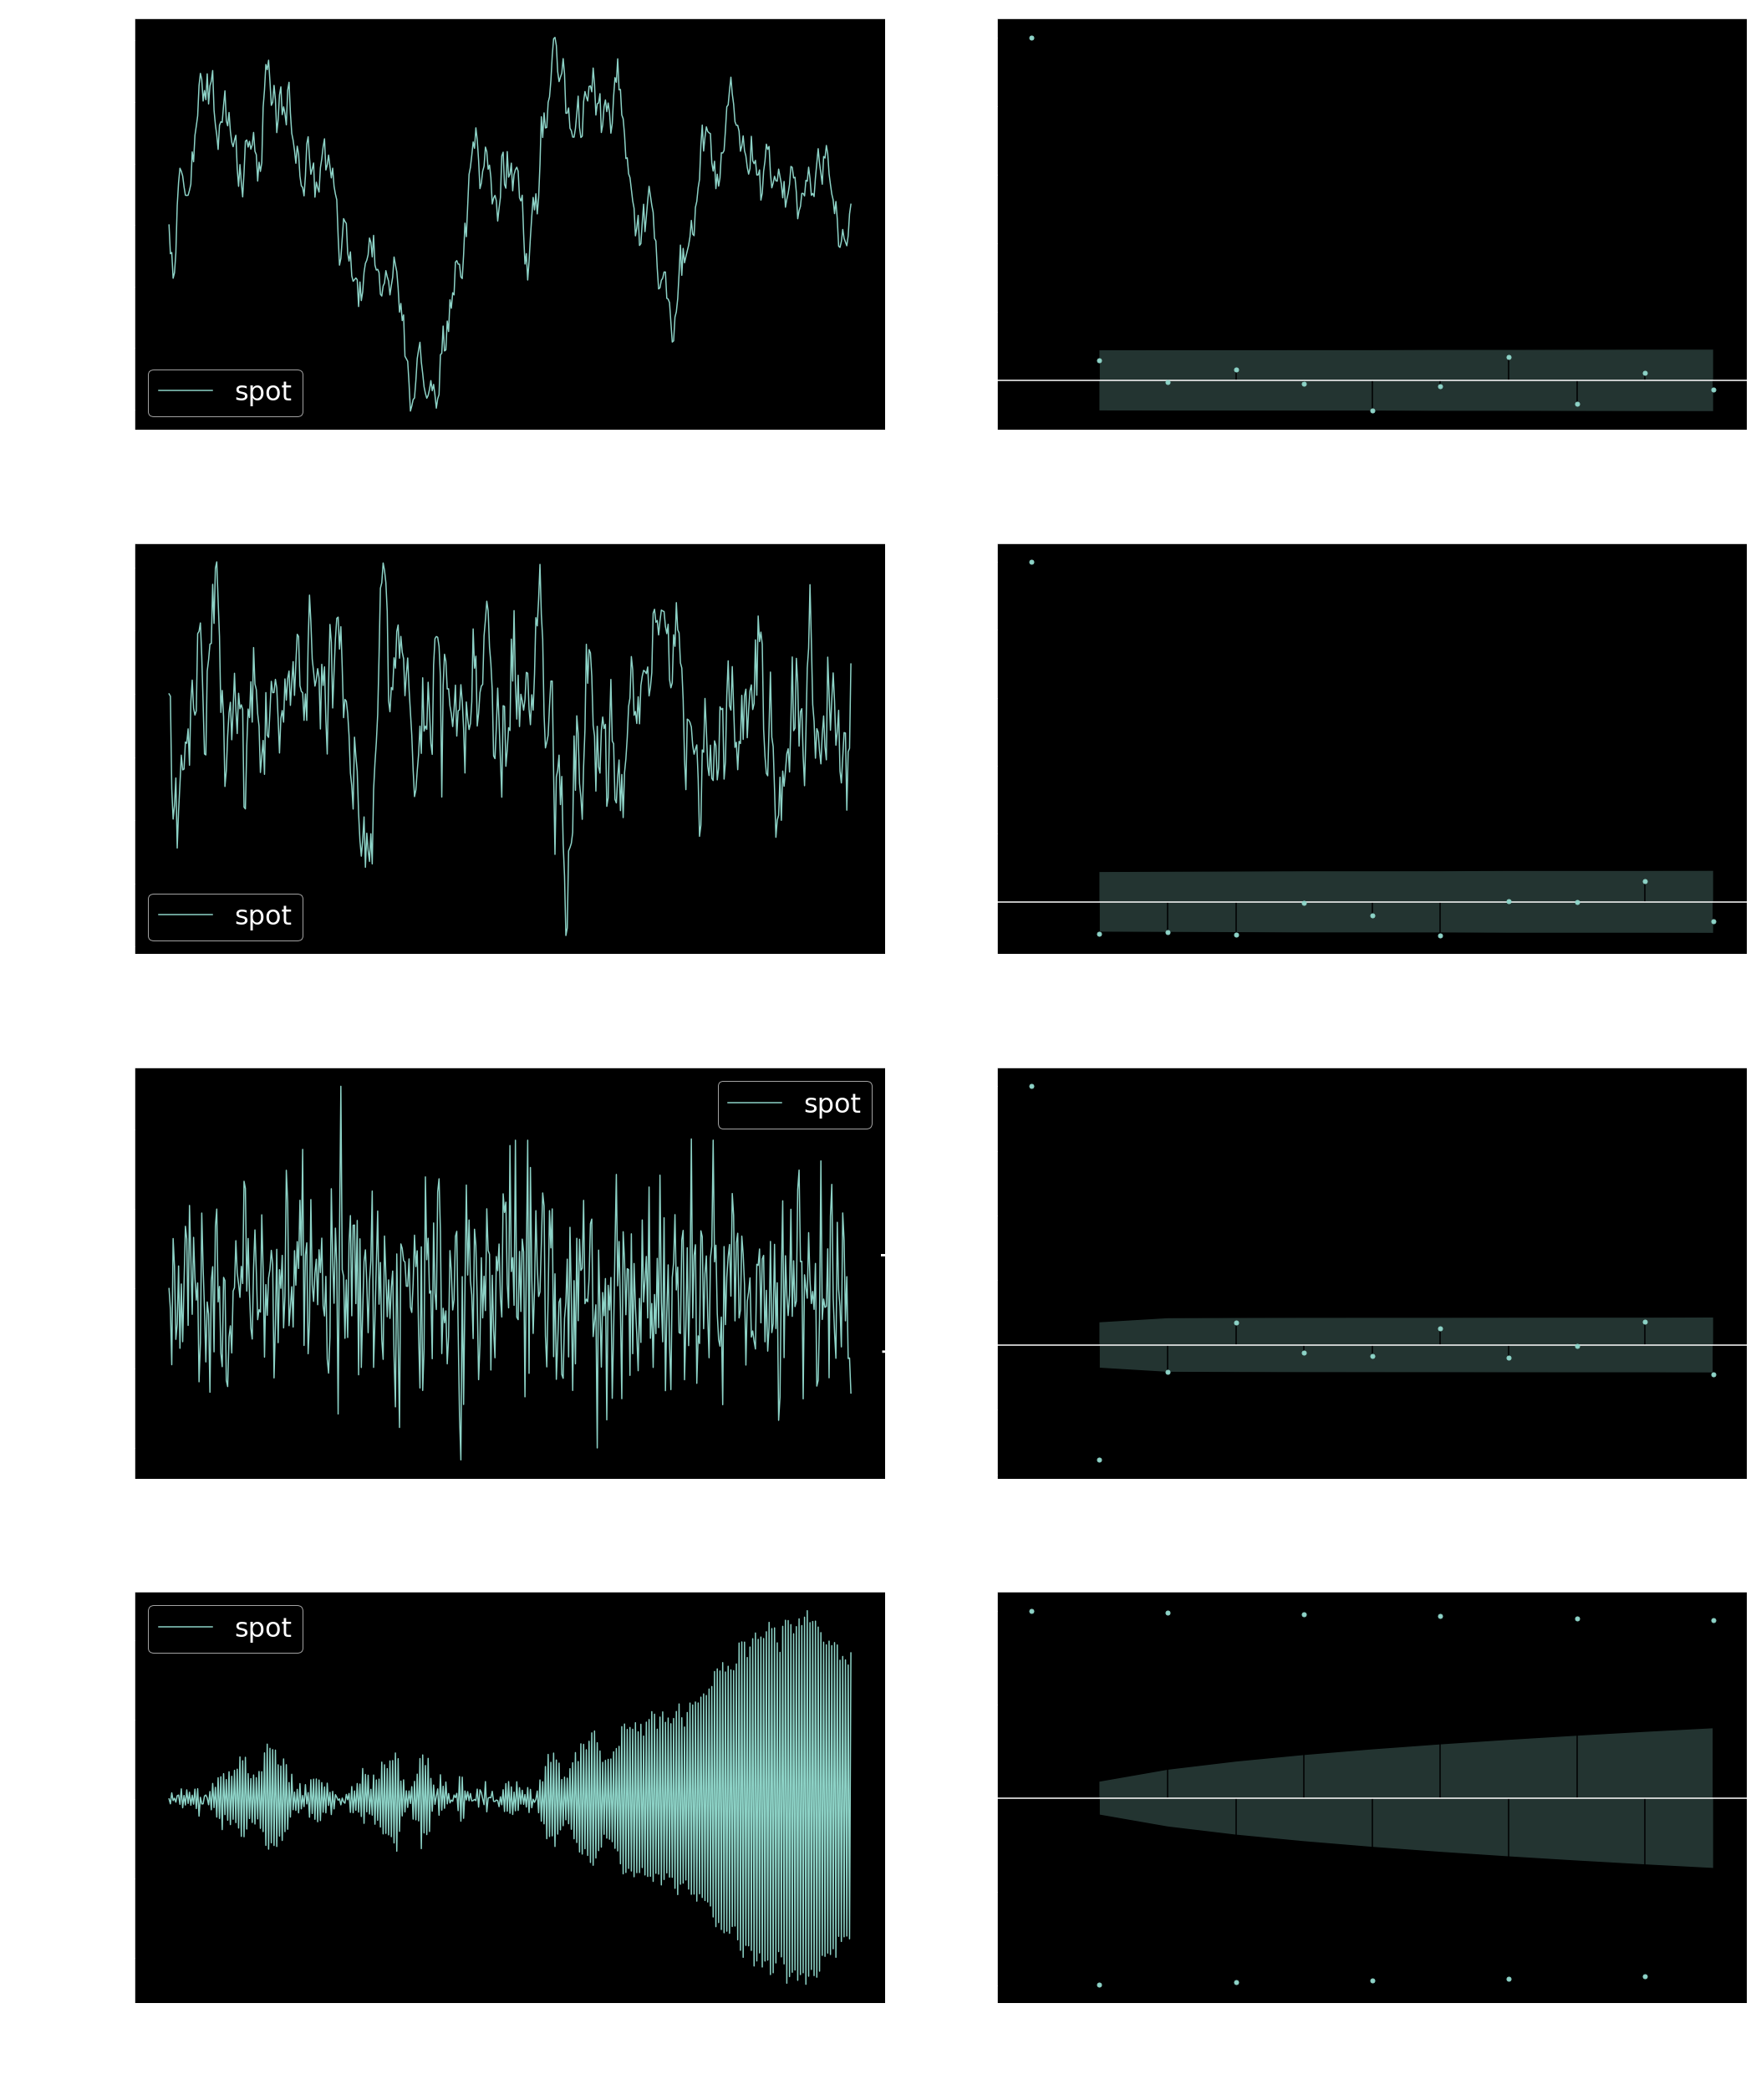

In [4]:
fig, axes = plt.subplots(figsize=(29, 35), nrows=4, ncols=2)

mean_reversions = [1.0, 1e1, 5e1, 1e2]

X = Vasicek(x0=100, T=10, scheme_steps=SCHEME_STEPS, vol=1,\
                long_term=100,\
                barrier=0, barrier_condition='absorb')

for i, ax_row in enumerate(axes):
    mean_reversion = mean_reversions[i]
    X.mean_reversion = mean_reversion
    df = X.simulate()
    
    for j, ax in enumerate(ax_row):        
        if j == 0:
            df.plot(kind='line', ax=ax)
            ax.set_xlabel('time\nmean_reversion={:.0f}'.format(mean_reversion), fontsize=FONT_SIZE)
            ax.legend(prop={'size': LEGEND_SIZE})
            ax.set_ylabel('spot', fontsize=FONT_SIZE)
        else:
            rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
            plot_acf(rets.values, lags=LAGS, ax=ax, zero=True)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
            ax.set_xlabel('time\nmean_reversion={:.0f}'.format(mean_reversion), fontsize=FONT_SIZE)
            ax.set_ylabel('autocorrelogram', fontsize=FONT_SIZE)
        
        ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()

## Fractional Brownian motion

* $H=\frac{1}{2}$ : Brownian motion
* $H<\frac{1}{2}$ : mean-reverting, rougher sample paths
* $H>\frac{1}{2}$ : trend-following, smoother sample paths

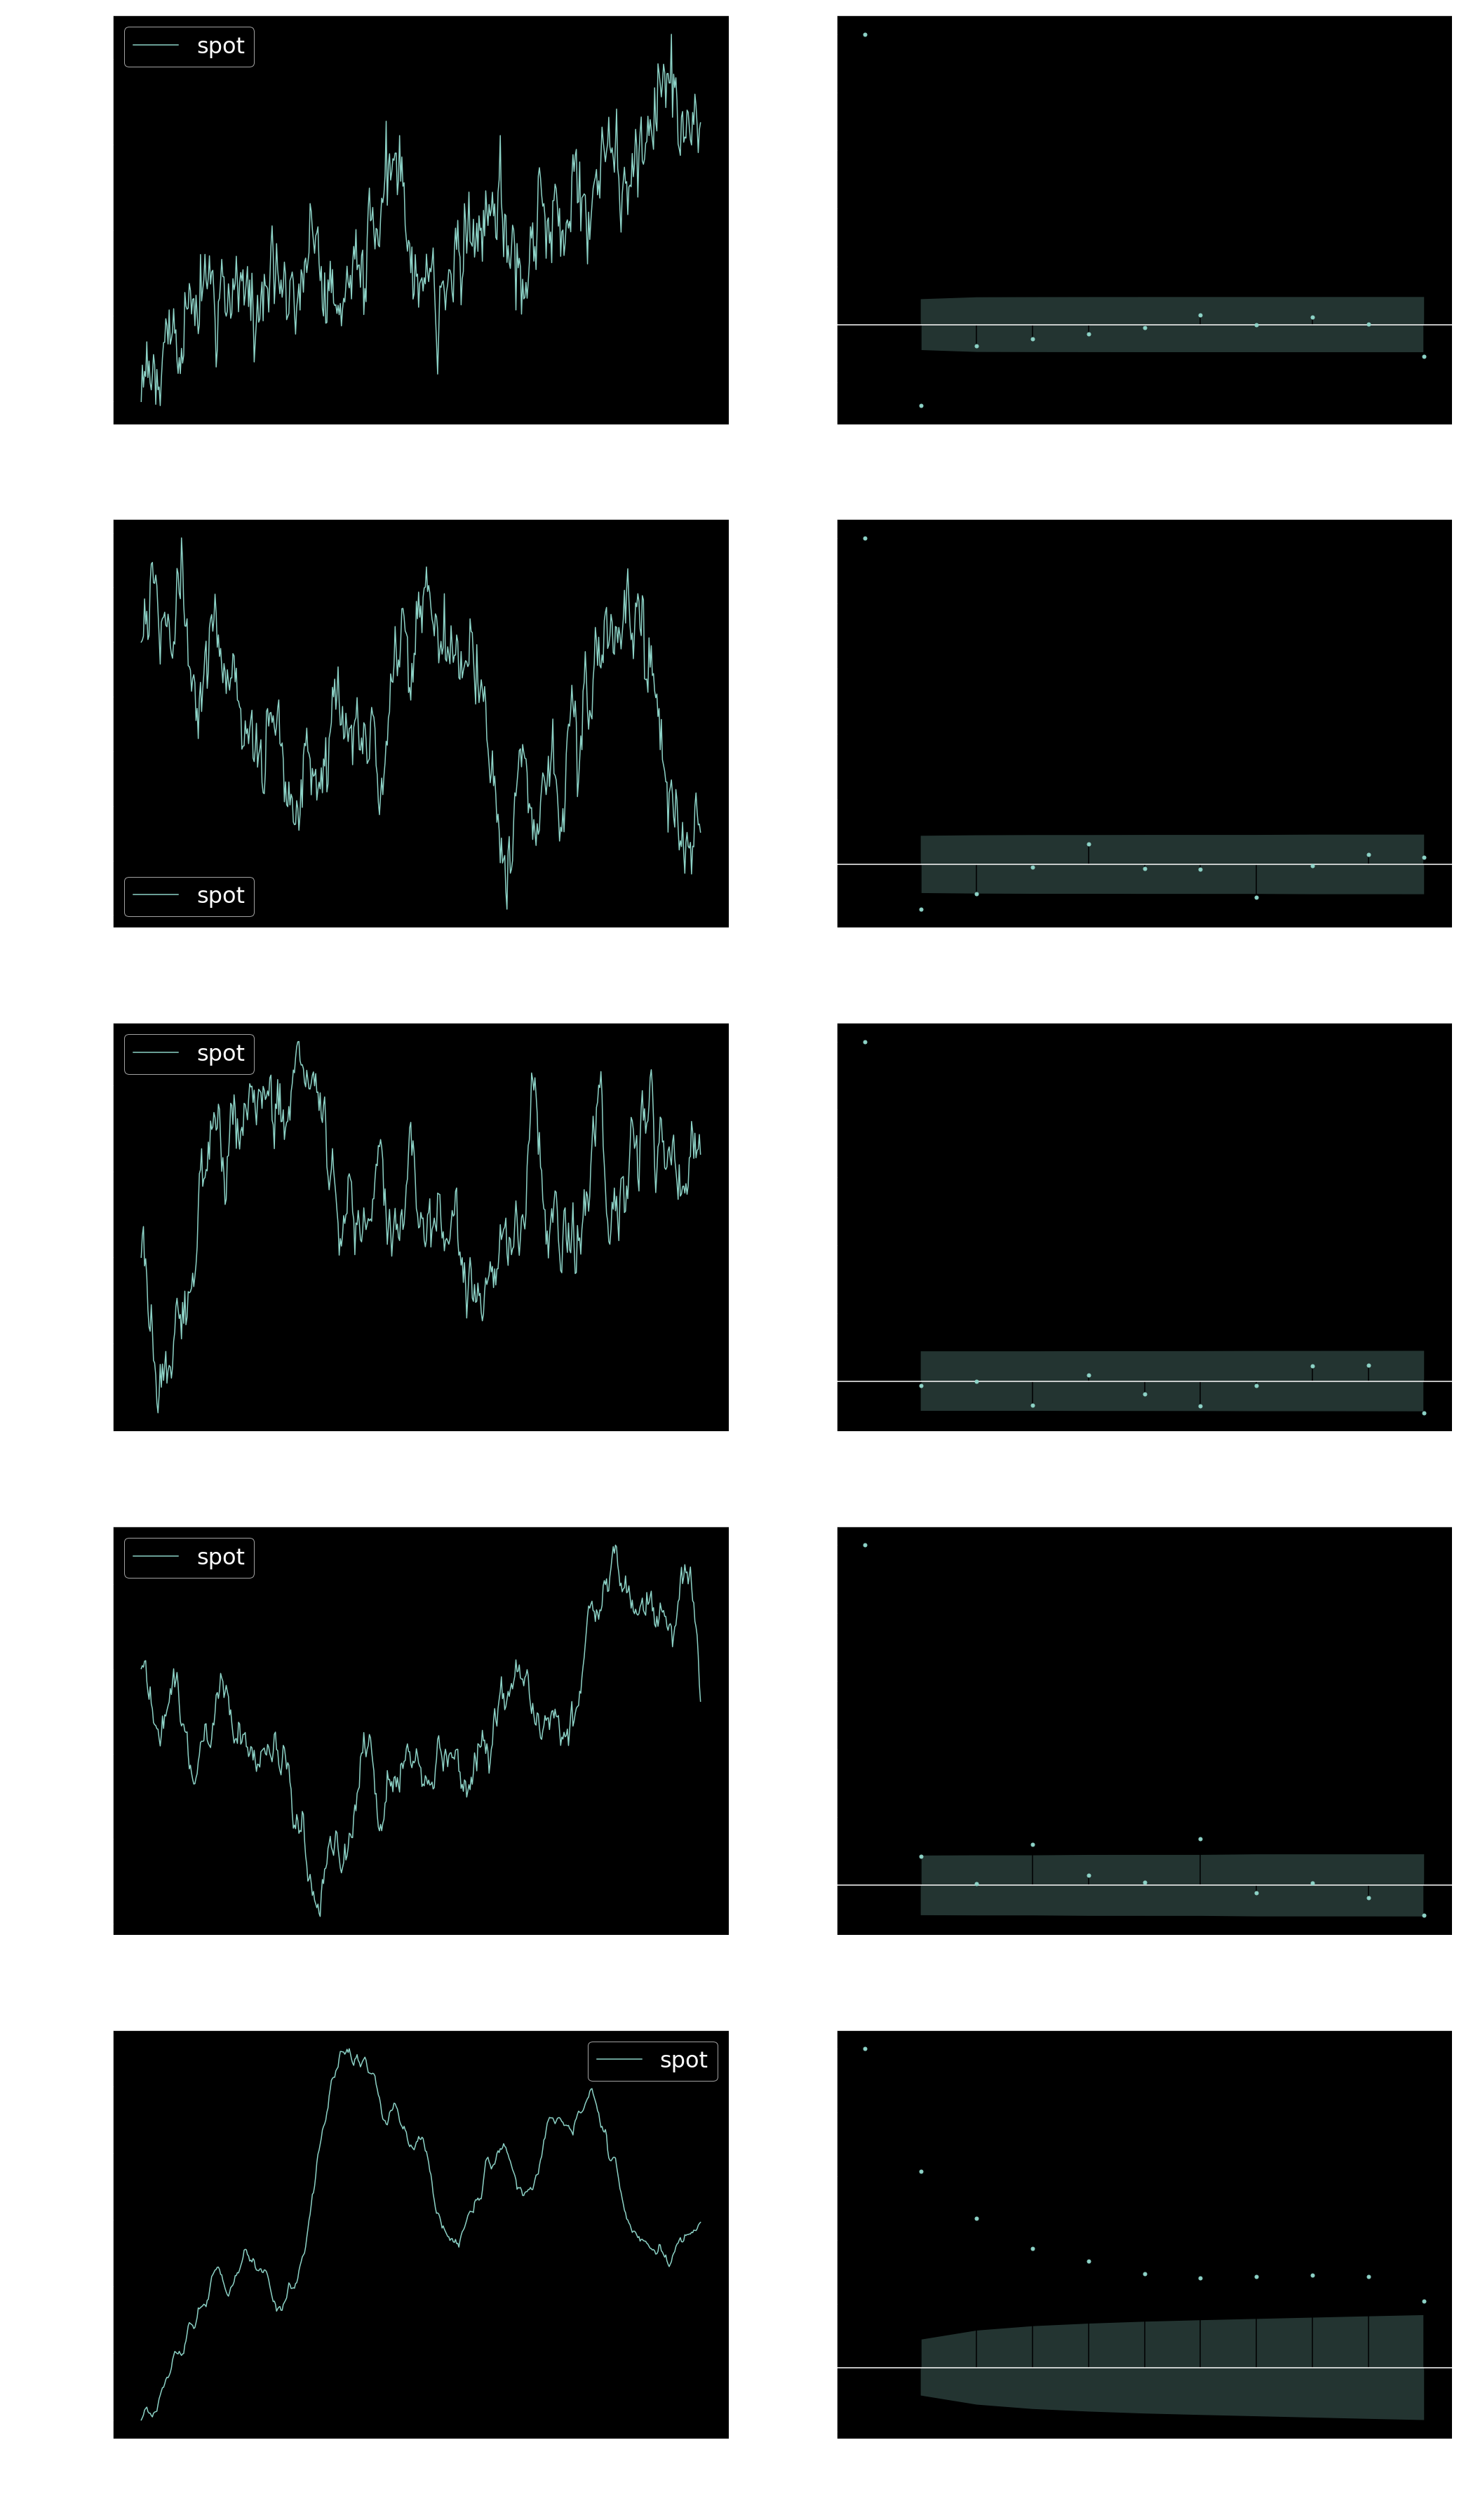

In [5]:
fig, axes = plt.subplots(figsize=(29, 50), nrows=5, ncols=2)

X = FBM(x0=100, T=T, scheme_steps=SCHEME_STEPS, drift=0, vol=1)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    for j, ax in enumerate(ax_row):
        if j == 0:
            df.plot(kind='line', ax=ax)
            ax.set_xlabel('time\nH={:.2f}'.format(H), fontsize=FONT_SIZE)
            ax.legend(prop={'size': LEGEND_SIZE})
            ax.set_ylabel('spot', fontsize=FONT_SIZE)
        else:
            rets = ((df-df.shift(1))/df.shift(1)).iloc[1:]
            plot_acf(rets.values, lags=LAGS, ax=ax, zero=True)
            ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
            ax.set_xlabel('time\nH={:.2f}'.format(H), fontsize=FONT_SIZE)
            ax.set_ylabel('autocorrelogram', fontsize=FONT_SIZE)
        
        ax.tick_params(labelsize=FONT_SIZE)

plt.tight_layout()
plt.show()